# boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('bostan_housing_rent.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
corr = df.corr()
corr.shape

(14, 14)

In [6]:
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

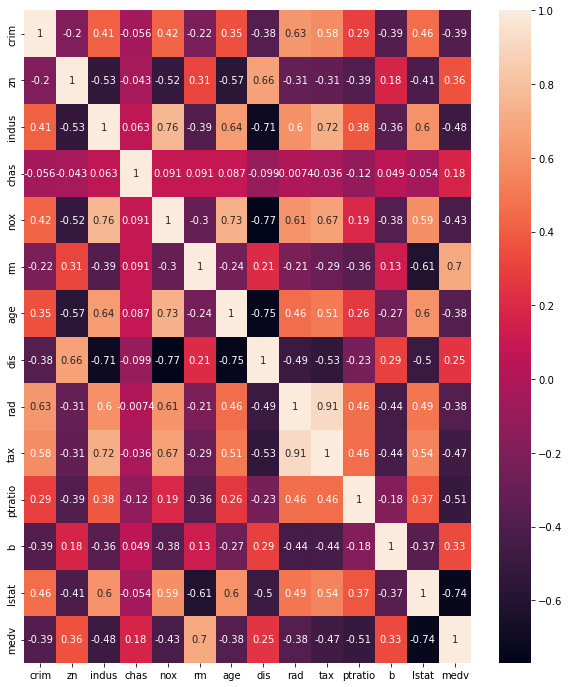

In [8]:
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

# rad and tax correlated

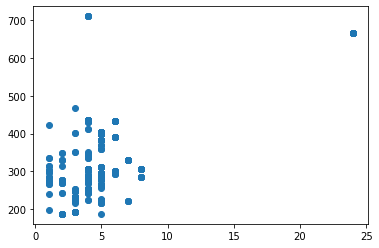

In [9]:
plt.scatter(df.rad,df.tax)

plt.show()

In [10]:
x = df.drop(['medv'],axis=1)
y = df['medv']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [12]:
from sklearn.ensemble import AdaBoostRegressor

In [13]:
ada = AdaBoostRegressor()

In [14]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

# testing

In [15]:
y_pred = ada.predict(x_test)

In [17]:
from sklearn import metrics

In [18]:
accuracy = metrics.r2_score(y_test,y_pred)

In [19]:
accuracy

0.8045636713082689

# traning

In [20]:
y_pred = ada.predict(x_train)

In [21]:
accuracy = metrics.r2_score(y_train,y_pred)

In [22]:
accuracy

0.9149763654645717

# hyperparameter tunnig randomized search cv

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [24]:
param = ({'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]})

In [25]:
rnd_search = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=param)

In [26]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [28]:
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)

In [29]:
ada = AdaBoostRegressor(learning_rate=0.4,n_estimators=60)

ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)


    base_estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=None,
)

In [30]:
y_pred = ada.predict(x_test)

In [31]:
accuracy = metrics.r2_score(y_test,y_pred)

In [32]:
accuracy

0.8548123448776375